# Exploratory Data Analysis (EDA)

W tym notebooku przeprowadzana jest analiza eksploracyjna danych zawierających informacje o niewypłacalności kredytowej. Analiza obejmuje:
1. Przegląd danych
2. Analizę brakujących wartości
3. Podsumowanie statystyczne
4. Analizę korelacji
5. Analizę danych kategorycznych
6. Analizę zmiennej docelowej
7. Dodatkowe spostrzeżenia

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfiguracja ustawień wizualizacji
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
data = pd.read_csv("../../data/Loan_Default.csv")
data.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


### Sekcja 1: Przegląd danych
Ogólne informacje o zbiorze danych, w tym jego rozmiar, typy danych w kolumnach oraz kilka pierwszych wierszy.


In [12]:
print("Rozmiar zbioru danych:", data.shape)
print("\nNazwy kolumn i typy danych:")
print(data.dtypes)
print("\nPodgląd danych:")
print(data.head())


Rozmiar zbioru danych: (148670, 34)

Nazwy kolumn i typy danych:
ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Sco

### Sekcja 2: Analiza brakujących wartości




Podsumowanie brakujących wartości:
                           Brakujące wartości   % Braków
Upfront_charges                         39642  26.664425
Interest_rate_spread                    36639  24.644515
rate_of_interest                        36439  24.509989
dtir1                                   24121  16.224524
property_value                          15098  10.155378
LTV                                     15098  10.155378
income                                   9150   6.154571
loan_limit                               3344   2.249277
approv_in_adv                             908   0.610749
age                                       200   0.134526
submission_of_application                 200   0.134526
loan_purpose                              134   0.090133
Neg_ammortization                         121   0.081388
term                                       41   0.027578
year                                        0   0.000000
ID                                          0   0.00

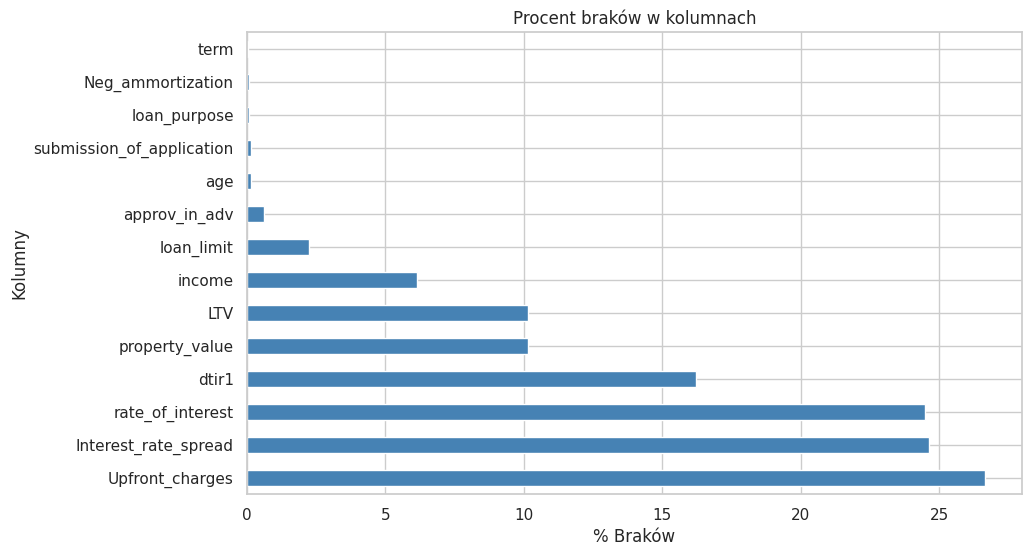

In [4]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({
    "Brakujące wartości": missing_values,
    "% Braków": missing_percentage
}).sort_values(by="% Braków", ascending=False)

print("\nPodsumowanie brakujących wartości:")
print(missing_summary)


def plot_missing_values(summary):
    summary_filtered = summary[summary["% Braków"] > 0]
    summary_filtered["% Braków"].plot(kind='barh', color='steelblue')
    plt.title("Procent braków w kolumnach")
    plt.xlabel("% Braków")
    plt.ylabel("Kolumny")
    plt.show()

plot_missing_values(missing_summary)


### Sekcja 3: Podsumowanie statystyczne
Statystyki opisowe dla zmiennych numerycznych oraz wizualizacja rozkładu kwoty pożyczek.



Podsumowanie statystyczne danych numerycznych:
                  ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000

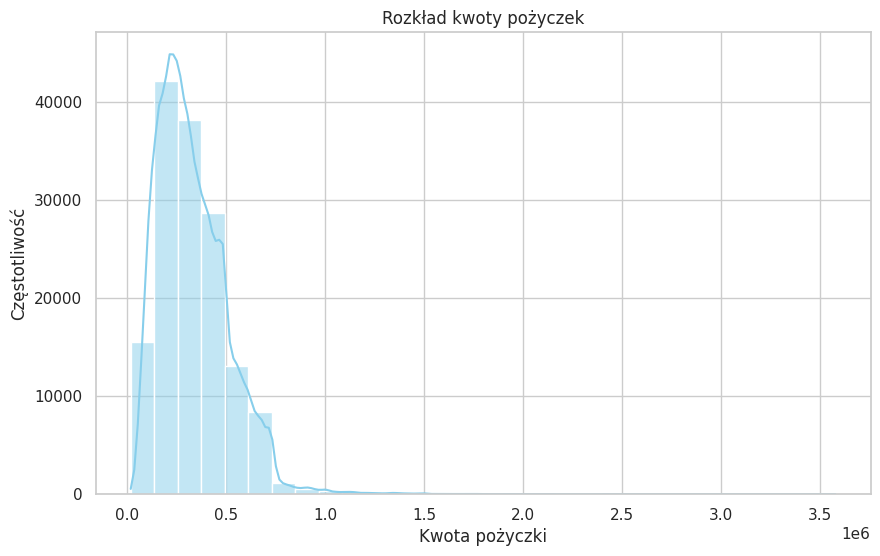

In [5]:
# Statystyki opisowe
numerical_data = data.select_dtypes(include=[np.number])
print("\nPodsumowanie statystyczne danych numerycznych:")
print(numerical_data.describe())

# Rozkład kwoty pożyczek
sns.histplot(data=data, x="loan_amount", bins=30, kde=True, color="skyblue")
plt.title("Rozkład kwoty pożyczek")
plt.xlabel("Kwota pożyczki")
plt.ylabel("Częstotliwość")
plt.show()


### Sekcja 4: Analiza korelacji
Macierz korelacji dla zmiennych numerycznych przedstawiona w postaci mapy cieplnej.


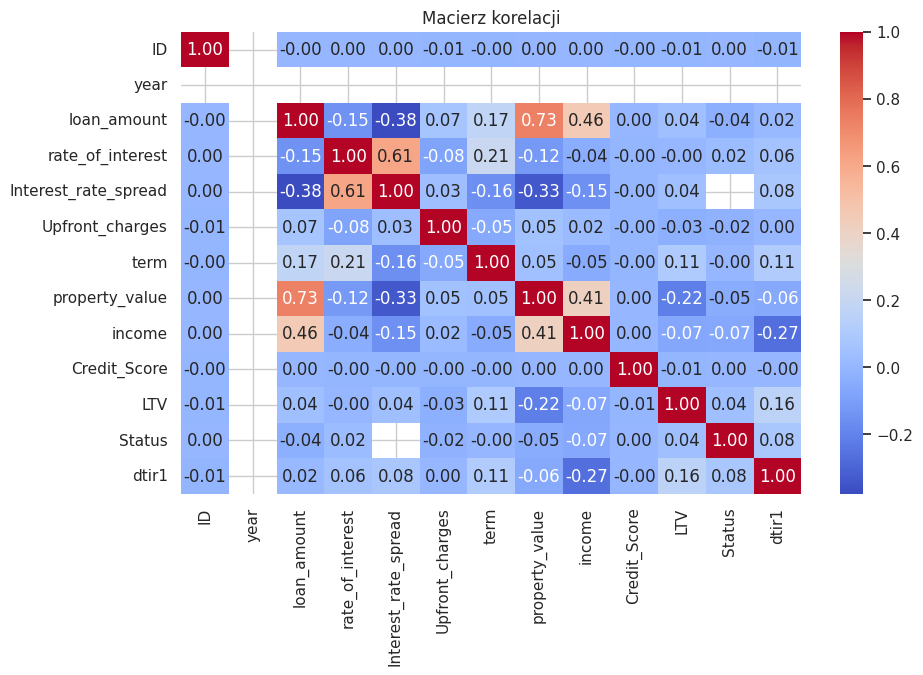

In [6]:
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
plt.show()


### Sekcja 5: Analiza danych kategorycznych
Rozkład płci oraz celów pożyczek w zbiorze danych.


/tmp/ipykernel_24074/555148212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Gender", order=data["Gender"].value_counts().index, palette="pastel")


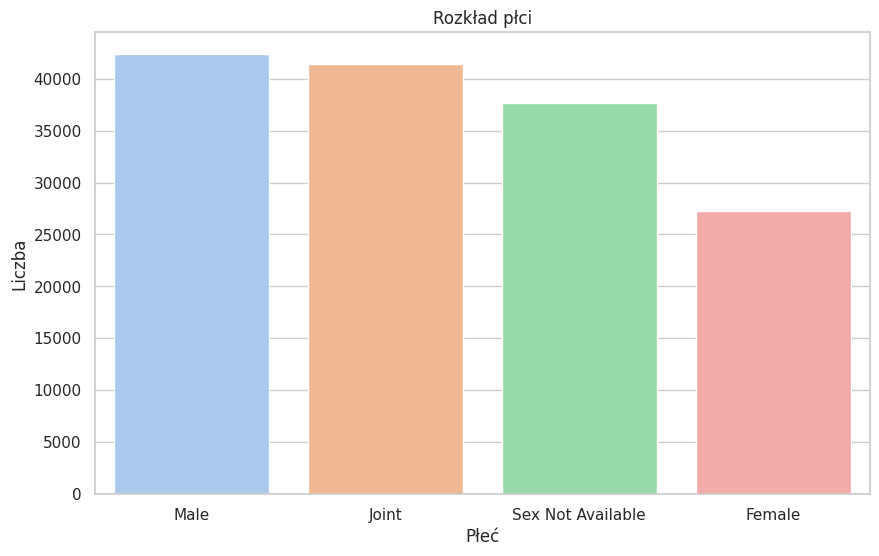

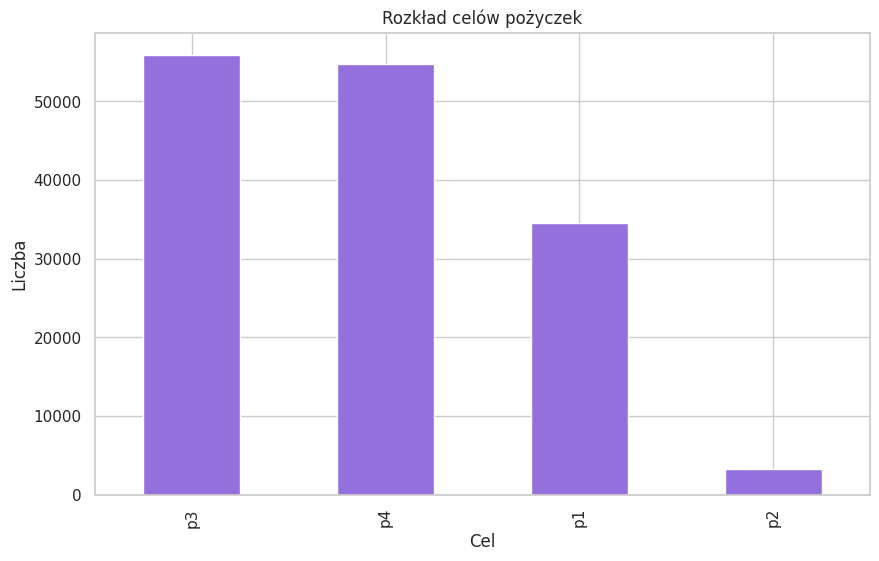

In [7]:
# Rozkład płci
sns.countplot(data=data, x="Gender", order=data["Gender"].value_counts().index, palette="pastel")
plt.title("Rozkład płci")
plt.xlabel("Płeć")
plt.ylabel("Liczba")
plt.show()

# Rozkład celów pożyczek
loan_purpose_counts = data["loan_purpose"].value_counts()
loan_purpose_counts.plot(kind='bar', color='mediumpurple')
plt.title("Rozkład celów pożyczek")
plt.xlabel("Cel")
plt.ylabel("Liczba")
plt.show()


### Sekcja 6: Analiza zmiennej docelowej
Analiza rozkładu zmiennej docelowej oraz jej relacji z kwotą pożyczki.


/tmp/ipykernel_24074/3047224418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Status", palette="muted")


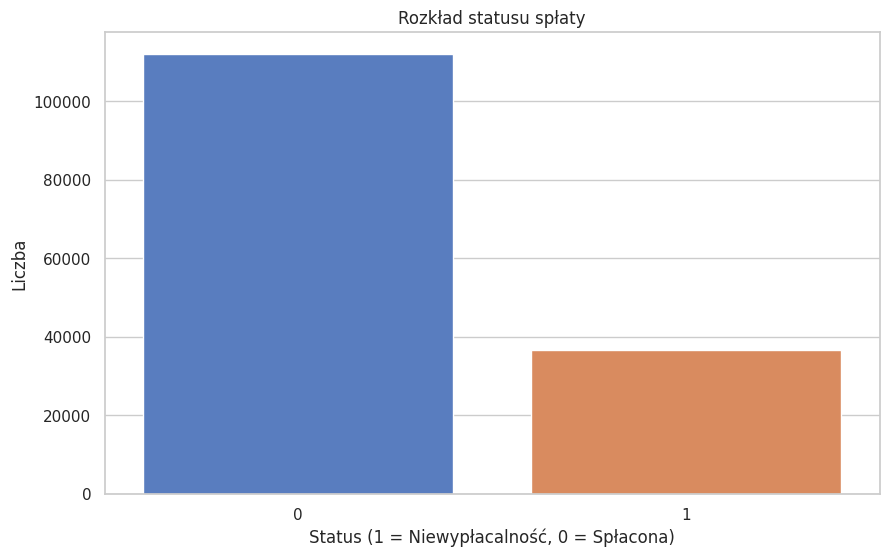

/tmp/ipykernel_24074/3047224418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Status", y="loan_amount", palette="cool")


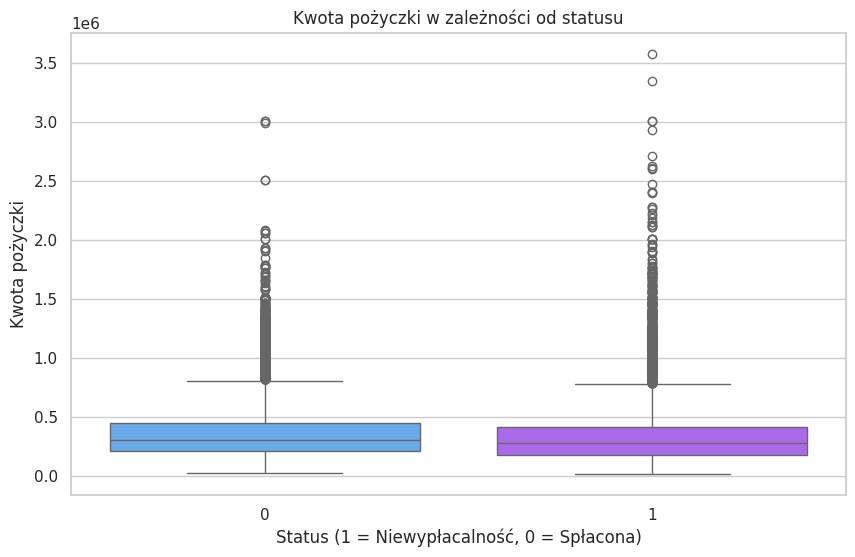

In [8]:
# Rozkład zmiennej docelowej
sns.countplot(data=data, x="Status", palette="muted")
plt.title("Rozkład statusu spłaty")
plt.xlabel("Status (1 = Niewypłacalność, 0 = Spłacona)")
plt.ylabel("Liczba")
plt.show()

# Relacja między kwotą pożyczki a statusem
sns.boxplot(data=data, x="Status", y="loan_amount", palette="cool")
plt.title("Kwota pożyczki w zależności od statusu")
plt.xlabel("Status (1 = Niewypłacalność, 0 = Spłacona)")
plt.ylabel("Kwota pożyczki")
plt.show()


### Spostrzeżenia
Dodatkowe wizualizacje dotyczące wartości nieruchomości i wyniku kredytowego w kontekście niewypłacalności.


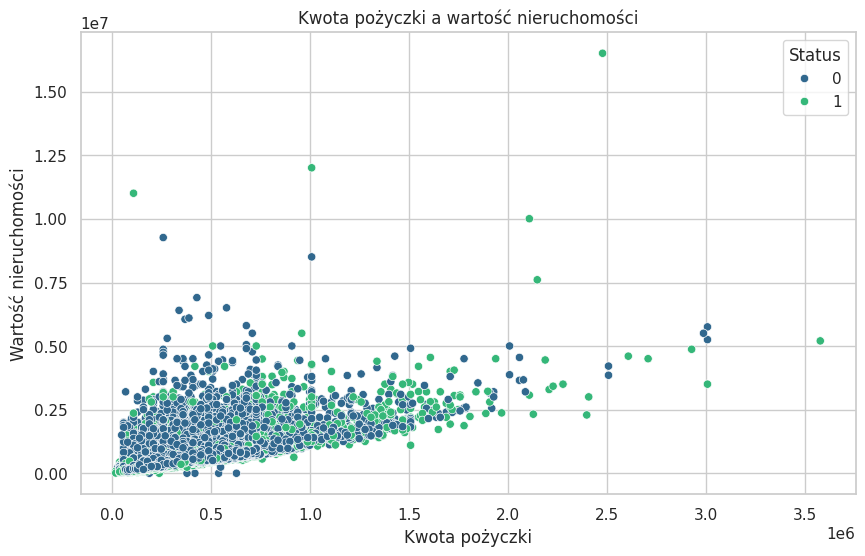

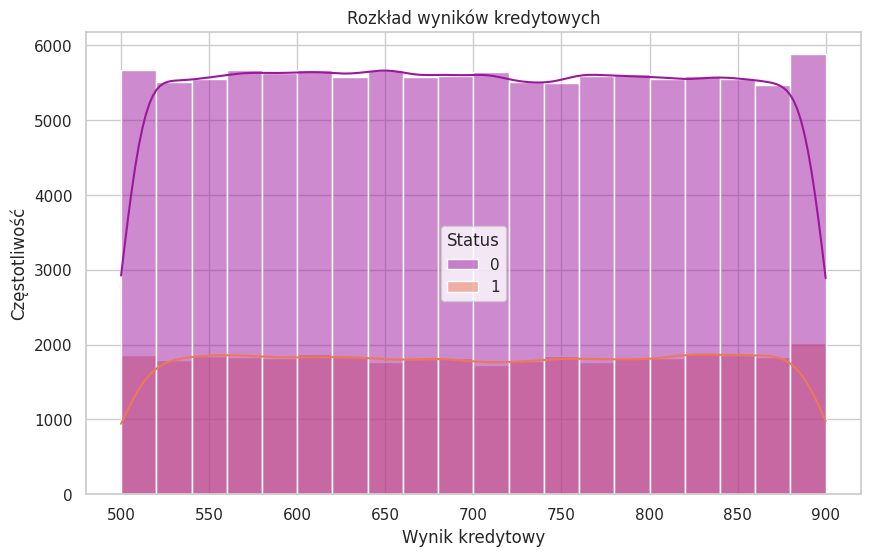

In [9]:
# Analiza wartości nieruchomości
sns.scatterplot(data=data, x="loan_amount", y="property_value", hue="Status", palette="viridis")
plt.title("Kwota pożyczki a wartość nieruchomości")
plt.xlabel("Kwota pożyczki")
plt.ylabel("Wartość nieruchomości")
plt.show()

# Rozkład wyników kredytowych
sns.histplot(data=data, x="Credit_Score", kde=True, hue="Status", palette="plasma", bins=20)
plt.title("Rozkład wyników kredytowych")
plt.xlabel("Wynik kredytowy")
plt.ylabel("Częstotliwość")
plt.show()
